# Unsupervised Learning

### Import Library

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Baca dan tampilkan data

In [16]:
dt = pd.read_csv("possum.csv")
dt.head(5)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


### Menggunakan SimpleImputer untuk mengganti nilai null

In [18]:
from sklearn.impute import SimpleImputer
imputer_modus = SimpleImputer(strategy='most_frequent')
dt['age'] = imputer_modus.fit_transform(dt[['age']])

## K-Means Clustering

### Membuat Model

In [19]:
model = KMeans(n_clusters = 3)

### Memilih titik yang dilatih

In [20]:
points = dt[['age', 'belly']]

### Fitting model dengan titik yang sudah dipilih

In [21]:
model.fit(points)

KMeans(n_clusters=3)

### Untuk memberi label cluster pada masing2 data dari titik yang sudah dipilih 

In [23]:
label = model.labels_
label

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 2, 0, 0, 0, 0, 1, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 0, 2,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 0, 0, 2, 0, 1, 0,
       2, 0, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0])

## Visualisasi

### Membuat dataframe

In [29]:
dataset_KMeans = pd.DataFrame({'Labels' : label, 'Age' : dt.age})

### Melakukan crosstab dan ditampilkan

In [30]:
crosstab = pd.crosstab(dataset_KMeans['Labels'], dataset_KMeans['Age'])
crosstab

Age,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Labels,,,,,,,,,
0,3,10,18,5,7,4,2,0,0
1,0,3,6,7,6,7,5,1,2
2,7,3,5,2,0,1,0,0,0


## Centroid

### Menyimpan titik dengan attribute ke dalam variable

In [31]:
X = points['age']
Y = points['belly']

### Menampung koordinat tiap centroid

In [33]:
centroids = model.cluster_centers_
centroids

array([[ 3.46938776, 31.91836735],
       [ 5.        , 35.40540541],
       [ 2.33333333, 28.61111111]])

In [ ]:
centroids_X = centroids[:,0]
centroids_Y = centroids[:,1]

## Visualisasi

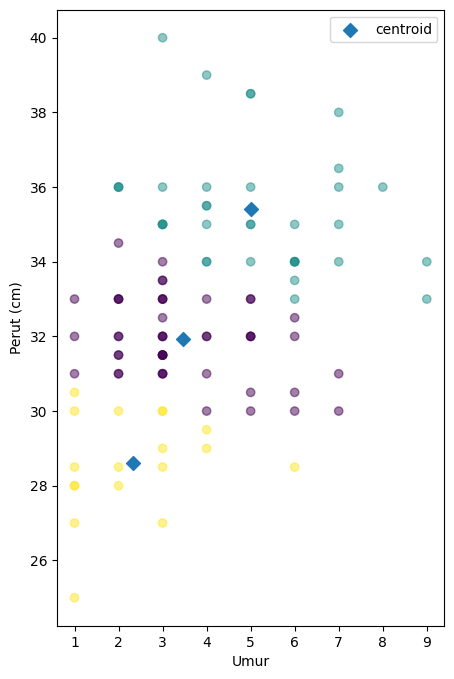

In [40]:
plt.figure(figsize=(5,8))
plt.scatter(X,Y,alpha=0.5, c=label)
plt.scatter(centroids_X, centroids_Y, marker='D', s=50, label='centroid')
plt.xlabel('Umur')
plt.ylabel('Perut (cm)')
plt.legend()
plt.show()